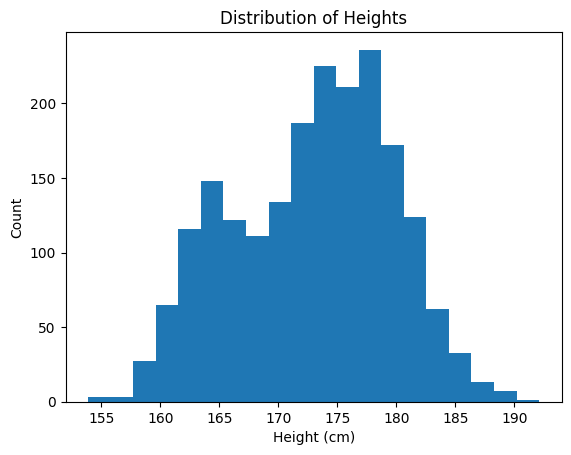

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义高斯分布的参数
mean1, std1 = 164, 3
mean2, std2 = 176, 5

# 从两个高斯分布中生成各50个样本
data1 = np.random.normal(mean1, std1, 500)
data2 = np.random.normal(mean2, std2, 1500)
data = np.concatenate((data1, data2), axis=0)

# 将数据写入 CSV 文件
df = pd.DataFrame(data, columns=['height'])
df.to_csv('height_data.csv', index=False)

# 绘制数据的直方图
plt.hist(data, bins=20)
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.title('Distribution of Heights')
plt.show()

男生：均值= 175.7360089547869 ; 标准差= 4.8156737687863105 ; 权重= 0.7565437461760675
女生：均值= 163.93106454985195 ; 标准差= 2.863459439522339 ; 权重= 0.24345625382393252
女生测试集正确率： 92.00 %
男生测试集正确率： 92.67 %
迭代次数： 204


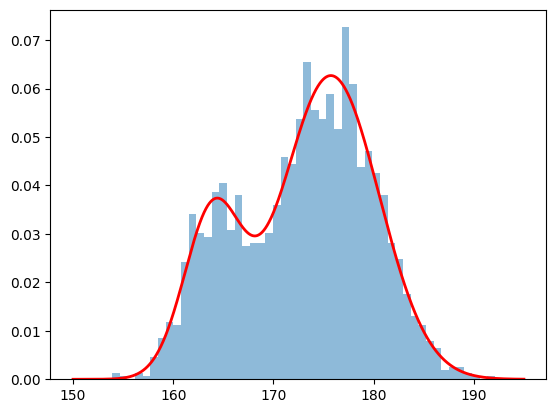

In [6]:
import math
import numpy as np

accuracy=0.00000001
stepnum=0
#测试集和训练集
girl = data[:500]
boy = data[500:]
girl_train = girl[:400]
girl_test = girl[400:]
boy_train = boy[:1200]
boy_test = boy[1200:]

def gauss_pdf(x, miu, sigma):#高斯函数的概率密度函数  pdf表示概率密度
    pdf = 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-0.5 * ((x - miu) / sigma) ** 2)
    return pdf

def test(test_data, miu0, miu1, sigema0, sigema1):   #测试男女概率   
    prob_girl = gauss_pdf(test_data, miu0, sigema0)
    prob_boy = gauss_pdf(test_data, miu1, sigema1)
    count_boy = 0
    count_girl = 0
    for i in range(len(prob_girl)):
        if prob_girl[i] >= prob_boy[i]:
            count_girl += 1
        else:
            count_boy += 1
    return count_boy, count_girl

data_train=np.concatenate([girl_train,boy_train]) #合并训练集
#初始化训练参数
miu0=np.min(data_train)
miu1=np.max(data_train)
sigema0=np.std(data_train) #标准差
sigema1=sigema0
p0=0.5
p1=0.5
lenn=len(data_train)
while True:
    stepnum+=1
    #print(step_num,miu0,miu1,sigema0,sigema1,p0,p1)
    miu0_pre=miu0
    miu1_pre=miu1
    sigema0_pre=sigema0
    sigema1_pre=sigema1
    p0_pre=p0
    p1_pre=p1
    
    #E
    gama0 = p0 * gauss_pdf(data_train, miu0, sigema0) / \
    (p0 * gauss_pdf(data_train, miu0, sigema0) + p1 * gauss_pdf(data_train, miu1, sigema1)) 
    gama1 = 1 - gama0
    
    #M 更新参数
    lenn0 = np.sum(gama0)
    lenn1 = lenn - lenn0
    miu0 = gama0.dot(data_train) / lenn0
    miu1 = gama1.dot(data_train) / lenn1
    sigema0 = np.sqrt(gama0.dot((data_train - miu0) ** 2) / lenn0)
    sigema1 = np.sqrt(gama1.dot((data_train - miu1) ** 2) / lenn1)
    p0 = lenn0 / lenn
    p1 = lenn1 / lenn
    if abs(sigema0_pre - sigema0) < accuracy and abs(sigema1_pre - sigema1) < accuracy \
    and abs(miu0_pre - miu0) < accuracy and abs(miu1_pre - miu1) < accuracy \
    and abs(p0_pre - p0) < accuracy and abs(p1_pre - p1) < accuracy:
        break
    if stepnum>100000:
        break
print("男生：均值=", miu1, "; 标准差=", sigema1, "; 权重=", p1)        
print("女生：均值=", miu0, "; 标准差=", sigema0, "; 权重=", p0)
girl_ic, girl_c = test(girl_test, miu0, miu1, sigema0, sigema1)
boy_c, boy_ic = test(boy_test, miu0, miu1, sigema0, sigema1)
girl_ac = ('%.2f' % (girl_c / len(girl_test) * 100))
boy_ac = ('%.2f' % (boy_c / len(boy_test) * 100))
print("女生测试集正确率：", girl_ac, '%')
print("男生测试集正确率：", boy_ac, '%')
print("迭代次数：",stepnum)
#绘图
x=data_train
x = np.linspace(150, 195, 5000)
y = p0 * gauss_pdf(x, miu0, sigema0) + p1 * gauss_pdf(x, miu1, sigema1)
plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, y, 'r-', linewidth=2)
plt.show()